Создание финансового ассистента на основе Django

Создаем проект "mysite"  

In [ ]:
!django-admin startproject site

Создаем приложения домашней страницы


In [ ]:
!py manage.py startapp home

Начальная структура сайта  
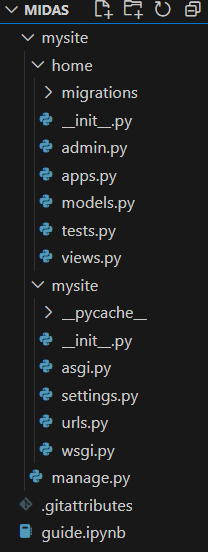

После добавления каждого нового приложения, его необходимо добавить в ```setting.py``` проекта

In [ ]:
INSTALLED_APPS = [
    ...
    'home',
]

В ```urls.py``` проекта подключите маршруты приложения:

In [ ]:
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('', include('home.urls')),
]

Создайте ```urls.py``` в папке приложения ```myapp``` (если его нет):

In [ ]:
from django.urls import path
from . import views

urlpatterns = [
    path('', views.home, name='home'),  # Добавляем маршрут для главной страницы
]

Откройте ```views.py``` в папке myapp и создайте простое представление:

In [ ]:
from django.http import HttpResponse

def home(request):
    return HttpResponse("Hello, Django!")

Приложения встроено в проект, давайте сделаем веб-страницу  
В прилодение создаем папку ```templates``` и в ней файл ```home.html```

In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Home</title>
</head>
<body>
    <h1>Welcome to Django!</h1>
</body>
</html>

Для корректной работы, изменим представление (view.py)

In [ ]:
from django.shortcuts import render

def home(request):
    return render(request, 'home.html')

Протестируем проект

In [ ]:
!python manage.py runserver

Созданим функцию аутентификации пользователя  
Создаём файл ```forms.py``` в приложение ```home```:

In [ ]:
from django import forms
from django.contrib.auth.models import User
from django.contrib.auth.forms import UserCreationForm

class RegistrationForm(UserCreationForm):

    class Meta:
        model = User
        fields = ['username', 'password1', 'password2']

Добавьте представление для обработки регистрации в views.py:

In [ ]:
from django.shortcuts import render, redirect
from .forms import RegistrationForm

def register(request):
    if request.method == 'POST':
        form = RegistrationForm(request.POST)
        if form.is_valid():
            form.save()
            return redirect('login')  # Перенаправляем пользователя на страницу входа
    else:
        form = RegistrationForm()
    return render(request, 'home/register.html', {'form': form})

Добавьте маршрут для регистрации в urls.py:

In [ ]:
from django.urls import path
from . import views

urlpatterns = [
    ...
    path('register/', views.register, name='register'),
]

Создайте шаблон register.html:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <title>Register</title>
</head>
<body>
    <h2>Register</h2>
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Register</button>
    </form>
</body>
</html>

В urls.py добавьте маршруты:

In [ ]:
from django.contrib.auth import views as auth_views

urlpatterns = [
    path('login/', auth_views.LoginView.as_view(template_name='account/login.html'), name='login'),
    path('logout/', auth_views.LogoutView.as_view(next_page='login'), name='logout'),
]

Создайте шаблон для входа (login.html):

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <title>Login</title>
</head>
<body>
    <h2>Login</h2>
    <form method="post">
        {% csrf_token %}
        {{ form.as_p }}
        <button type="submit">Login</button>
    </form>
    <p>Don't have an account? <a href="{% url 'register' %}">Register here</a></p>
</body>
</html>